Recordar que en el parcial se pueden utilizar las siguientes funciones:

``np.linalg.solve
np.linalg.det
np.linalg.qr
np.linalg.eig
np.linalg.eigvals
np.linalg.svd
np.log  --> calcula el logatirmo natural de un numero o de cada elemento de un array
np.exp  --> para calcular e elevado a un numero o a cada elemento de un array``

También se puede utilizar ``row_echelon``.

---

Puede utilizar la siguiente plantilla para realizar los gráficos del ejercicio 3 del parcial:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Ejercicio 1

a)

In [4]:
P = np.array([[0.25,0.4,0.2,0],[0.5,0.4,0.5,0.5],[0.25,0,0.1,0.4],[0,0.2,0.2,0.1]])

Matriz de transición

In [5]:
print(P)

[[0.25 0.4  0.2  0.  ]
 [0.5  0.4  0.5  0.5 ]
 [0.25 0.   0.1  0.4 ]
 [0.   0.2  0.2  0.1 ]]


Verifico que sea markov

In [6]:
sum(P)

array([1., 1., 1., 1.])

b)

Turistas iniciales por destino

In [7]:
x = np.array([400,500,500,600])

Convierto a estado

In [8]:
x0 = x/sum(x)
x0

array([0.2 , 0.25, 0.25, 0.3 ])

In [9]:
v = np.copy(x0)
for i in range(3):
  v = P@v
print(v)  

[0.27505 0.45475 0.1407  0.1295 ]


Turistas en A luego de 3 dias

In [10]:
print(v[0]*sum(x))

550.1


In [11]:
v = np.copy(x0)
for i in range(5):
  v = P@v
print(v)  

[0.27843713 0.4545475  0.13597988 0.1310355 ]


Turistas en D luego de 5 dias

In [12]:
print(v[3]*sum(x))

262.071


c)

In [13]:
aVals, aVects = np.linalg.eig(P)

In [14]:
aVals

array([ 1.        , -0.23860009, -0.1       ,  0.18860009])

Busco las coordenadas del estado inicial en base de autovectores de P

In [15]:
aVects

array([[-4.92629619e-01, -3.32402035e-01,  1.53235892e-17,
        -7.96945997e-01],
       [-8.03722025e-01,  3.82128289e-16, -4.08248290e-01,
         1.19286721e-16],
       [-2.39917022e-01,  8.12058328e-01,  8.16496581e-01,
         2.44662048e-01],
       [-2.31919788e-01, -4.79656293e-01, -4.08248290e-01,
         5.52283949e-01]])

In [16]:
v = np.copy(x0)
alphas = np.linalg.solve(aVects,v)
alphas

array([-0.56555058, -0.44915979,  0.50103199,  0.28597746])

Verifico

In [17]:
aVects@alphas

array([0.2 , 0.25, 0.25, 0.3 ])

convierto w1 a un estado

In [18]:
vInf = aVects[:,0]/sum(aVects[:,0])
vInf

array([0.27860697, 0.45454545, 0.13568521, 0.13116237])

Verifico (no cuenta como demostración)

In [19]:
v = np.copy(x0)
for i in range(1000):
  v = P@v
print(v)
print(P@v)

[0.27860697 0.45454545 0.13568521 0.13116237]
[0.27860697 0.45454545 0.13568521 0.13116237]


d)

Verifico que la factorizacion A = C@D@C^1 anda bien

In [20]:
D = np.diag(aVals)
P2 = aVects @ D @ np.linalg.inv(aVects)
for i in range(len(P2)):
  for j in range(len(P2[0])):
    P2[i][j] = round(P2[i][j],2)
P2

array([[0.25, 0.4 , 0.2 , 0.  ],
       [0.5 , 0.4 , 0.5 , 0.5 ],
       [0.25, 0.  , 0.1 , 0.4 ],
       [0.  , 0.2 , 0.2 , 0.1 ]])

In [21]:
Dinf = np.zeros((len(P),len(P[0])))
Dinf[0][0] = 1
Dinf

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [22]:
Pinf = aVects @ Dinf @ np.linalg.inv(aVects)
Pinf

array([[0.27860697, 0.27860697, 0.27860697, 0.27860697],
       [0.45454545, 0.45454545, 0.45454545, 0.45454545],
       [0.13568521, 0.13568521, 0.13568521, 0.13568521],
       [0.13116237, 0.13116237, 0.13116237, 0.13116237]])

Verifico (no cuenta como demostración)

In [23]:
for i in range(100):
  P = P@P/sum(P@P)
print(P)
print(P@P)

[[0.27860697 0.27860697 0.27860697 0.27860697]
 [0.45454545 0.45454545 0.45454545 0.45454545]
 [0.13568521 0.13568521 0.13568521 0.13568521]
 [0.13116237 0.13116237 0.13116237 0.13116237]]
[[0.27860697 0.27860697 0.27860697 0.27860697]
 [0.45454545 0.45454545 0.45454545 0.45454545]
 [0.13568521 0.13568521 0.13568521 0.13568521]
 [0.13116237 0.13116237 0.13116237 0.13116237]]


Ejercicio 2

In [24]:
M = np.array([[1,0,0],[2,1,0.5],[0,0.5,1]])
B = np.array([[1,0,0],[2,1,0],[0,0.5,1]]) # L + D
C = M - B
print(M)
print(B)
print(C)

[[1.  0.  0. ]
 [2.  1.  0.5]
 [0.  0.5 1. ]]
[[1.  0.  0. ]
 [2.  1.  0. ]
 [0.  0.5 1. ]]
[[0.  0.  0. ]
 [0.  0.  0.5]
 [0.  0.  0. ]]


In [25]:
Binv = np.linalg.inv(B)
print(Binv)
print(Binv@B)

[[ 1.   0.   0. ]
 [-2.   1.  -0. ]
 [ 1.  -0.5  1. ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [26]:
Mi = -Binv@C
Mi

array([[ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.5 ],
       [ 0.  ,  0.  ,  0.25]])

In [27]:
aValsM = np.linalg.eigvals(Mi)

In [28]:
aValsM

array([0.  , 0.  , 0.25])

Ejercicio 3

a)

In [29]:
x = np.array([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0])
y = np.array([0.13,0.68,1.49,1.6,1.85,1.96,2.2,2.27])

In [30]:
print(x)
print(y)

[0. 1. 2. 3. 4. 5. 6. 7.]
[0.13 0.68 1.49 1.6  1.85 1.96 2.2  2.27]


In [31]:
const = np.ones((len(x),1))
cuad = x**2

In [32]:
Af = np.c_[const,x,cuad]
Af

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.]])

In [33]:
alphasF = np.linalg.solve(Af.T@Af,Af.T@y)
alphasF

array([ 0.1825    ,  0.61857143, -0.04714286])

In [34]:
f = lambda x : alphasF[0] + alphasF[1] * x + alphasF[2] * x**2

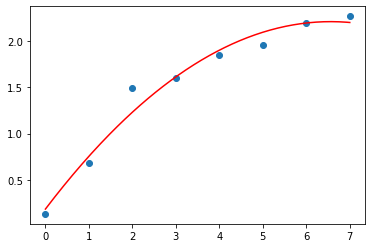

In [35]:
xs = np.linspace(x[0], x[-1], 200) 
ysF = f(xs)

plt.scatter(x, y)
plt.plot(xs, ysF,"r")

b)

In [36]:
yExp = np.e**y
yExp

array([1.13882838, 1.97387773, 4.43709552, 4.95303242, 6.35981952,
       7.09932707, 9.0250135 , 9.67940081])

In [37]:
Ag = np.c_[const,x]
Ag

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.]])

In [38]:
alphasG = np.linalg.solve(Ag.T@Ag,Ag.T@yExp)
alphasG

array([1.23191739, 1.243252  ])

In [39]:
g = lambda x : np.log(alphasG[0] + alphasG[1] * x)

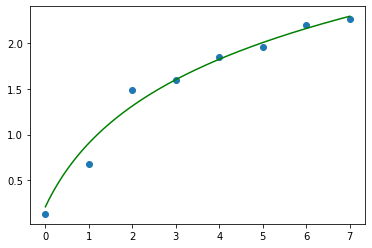

In [40]:
xs = np.linspace(x[0], x[-1], 200) 
ysG = g(xs)

plt.scatter(x, y)
plt.plot(xs, ysG,"g")

Las dos funciones juntas

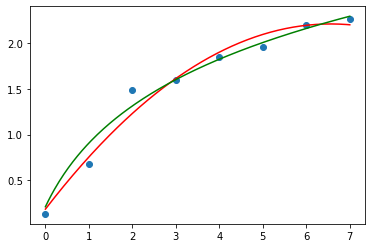

In [41]:
xs = np.linspace(x[0], x[-1], 200) 
ysF = f(xs)
ysG = g(xs)

plt.scatter(x, y)
plt.plot(xs, ysF,"r") # F
plt.plot(xs, ysG,"g") # G

c)

In [42]:
print(f(8))
print(g(8))

2.113928571428571
2.4139415980413745
